<a href="https://colab.research.google.com/github/Alexflames/frame-detection/blob/master/Unet_frame_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Автор
Григорьев Алексей, 451 группа, КНиИТ

## Задание
С помощью машинного обучения научиться различать рамки у картин для последующего вырезания и превращения изображений картин с рамками в картины **без** рамок

### Часть 2 - решение с использованием Unet
##### **"Простой" набор данных**
[Первый набор данных](https://drive.google.com/open?id=19Wx9l9C6IovJ5n1OTYzmt39w5cmIgzHJ) представляет 200 "простых для обработки" изображений картин с рамками,
собраны в поисковике google, посредством отфильтрации подходящих вручную.
- **Все** картины имеют рамки;
- Картины **не** повернуты под углом;
- Может быть свободное пространство любого цвета **до** рамки, **после** рамки перед изображением;
- Рамки преимущественно монотонные, но также иногда встречаются объмные варианты;
- Возможно наличие теней или других эффектов окружающего мира на центральной части изображения / с какой-то стороны от картины;
- Форматы изображений `.jpg | .png | .webp`;
- Изображения разных размеров, разное соотношение сторон;
- Различная цветовая гамма.

##### **Материал**
- [Использование Unet для решения своей задачи](https://medium.com/coinmonks/learn-how-to-train-u-net-on-your-dataset-8e3f89fbd623)
- [Гит-репозитории в Google Colab](https://medium.com/@ashwindesilva/how-to-use-google-colaboratory-to-clone-a-github-repository-e07cf8d3d22b)
- [Оригинальный репозиторий с Unet](https://github.com/zhixuhao/unet)
- [Подходящая версия под первую статью](https://github.com/zhixuhao/unet/commit/4b939a4dbd930eeaf3d6fffcb514860cb11c948d)

##### **Программа**
Далее следуют фрагменты программы для решения задачи



**Шаг №1**

Подключаем гугл-диск, клонируем мой форк оригинального Unet-репозитория
Форк необходим так как код немного модифицирован, ветка frame-detection создана из коммита *4b939a4dbd930eeaf3d6fffcb514860cb11c948d*

В ней заменены некоторые `.py` исходники в соответствии со статьей выше

In [1]:
from google.colab import drive
print("Если код выводит ошибки типа [Errno 2], игнорируйте их. Эти ошибки не мешают выполнению программы\n")
drive.mount('/content/gdrive')
! ls
# Замените путь после 'My Drive' на ваш собственный путь с проектом и данными
%cd gdrive/My Drive/Studies2/ML
# следующий фрагмент необходимо использовать только 1 раз в Вашем гугл-диске!!!
#! git clone https://github.com/Alexflames/unet.git
%cd unet
! git pull
! git checkout frame-detection
! git branch
%cd ..

Если код выводит ошибки типа [Errno 2], игнорируйте их. Эти ошибки не мешают выполнению программы

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data
/content/gdrive/My Drive/Studies2/ML
/content/gdrive/My Drive/Studies2/ML/unet
Already up to date.
M	data/test/0.tif
M	data/test/1.tif
M	data/test/10.tif
M	data/test/11.tif
M	data/test/12.tif
M	data/test/13.tif
D	data/test/14.tif
D	data/test/15.tif
D	data/test/16.tif
D	data/test/17.tif
D	data/test/18.tif
D	data/test/19.tif
M	data/test/2.tif
D	

#### **Шаг №2: Подготовка изображений**
Определим вспомогательные функции для визуализации выбранных изображений




31


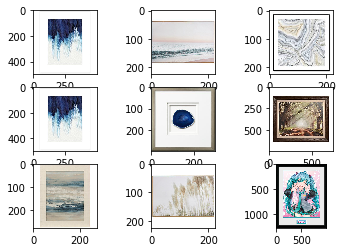

31


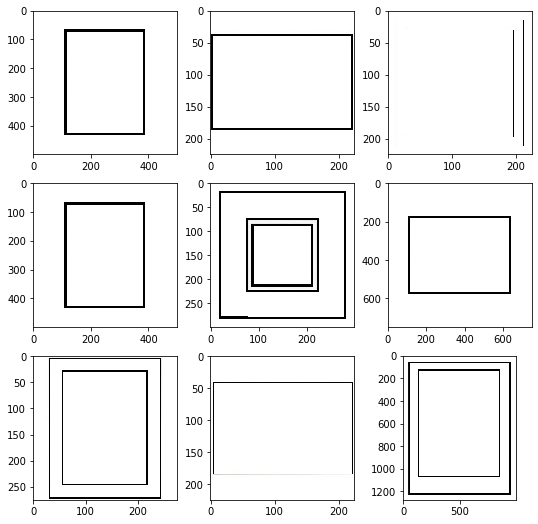

31


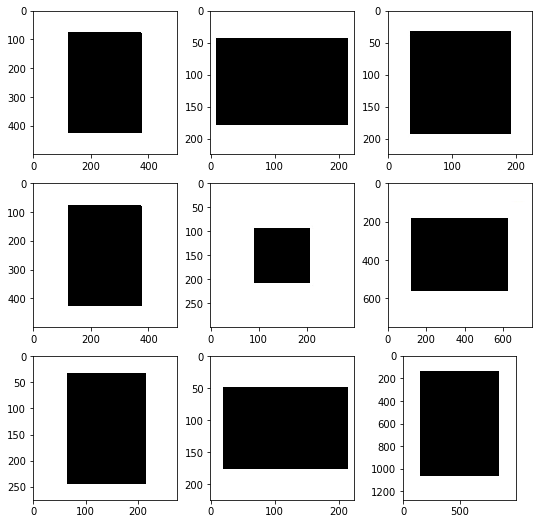

31


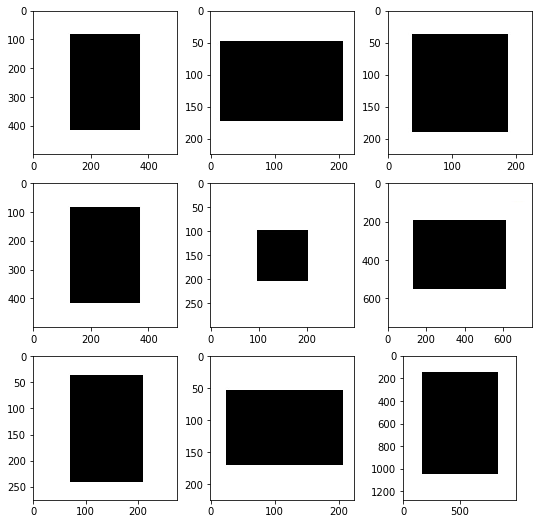

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

def nearest_square(limit):
    answer = 0
    while (answer+1)**2 < limit:
        answer += 1
    return (answer + 2)

# Функция отображения выборки изображений из папки на экран
def show_images(folder_name, X_images, random_index, figsize=14):
  filenames = []
  for filename in os.listdir(folder_name):
    if not filename.endswith(('.jpg', '.tif')):
      continue
    filenames.append(os.path.join(folder_name, filename))
 
  chosen_pictures = []
  print (len(filenames))
  for i_normal, index in enumerate(random_index):
    img_picked = cv2.imread(filenames[index])
    chosen_pictures.append(img_picked)

  X_nearest_square = nearest_square(X_images) - 1 # расположим X фигур в квадрате
  fig, axeslist = plt.subplots(ncols = X_nearest_square, nrows = X_nearest_square)
  
  for i in range(len(chosen_pictures)):
    img_picked = chosen_pictures[i]
    axeslist.ravel()[i].imshow(img_picked[:, :, ::-1]) # показ переведенного из BGR в RGB изображения
    #axeslist.ravel()[i].set_axis_off()
  
  plt.rcParams["figure.figsize"] = (figsize,figsize)
  plt.show()

X_images = 9
random_index = np.random.choice((31), X_images)

show_images("image_dataset_unet", X_images, random_index, figsize=9)
show_images("labels_dataset_unet", X_images, random_index, figsize=9)
show_images("labels_dataset_unet_content_dirty", X_images, random_index, figsize=9)
show_images("labels_dataset_unet_content_dirty2", X_images, random_index, figsize=9)

Подготовим изображения: сделаем единый размер и расширения файлов

(1, 'jpg')
(2, 'jpg')
(3, 'jpg')
(4, 'jpg')
(5, 'jpg')
(6, 'jpg')
(7, 'jpg')
(9, 'jpg')
(11, 'jpg')
(12, 'jpg')
(15, 'jpg')
(16, 'jpg')
(17, 'jpg')
(18, 'jpg')
(20, 'jpg')
(21, 'jpg')
(22, 'jpg')
(23, 'jpg')
(24, 'jpg')
(25, 'jpg')
(26, 'jpg')
(27, 'jpg')
(28, 'jpg')
(29, 'jpg')
(30, 'jpg')
(31, 'jpg')
(32, 'jpg')
(33, 'jpg')
(34, 'jpg')
(35, 'jpg')
(135, 'jpg')
31


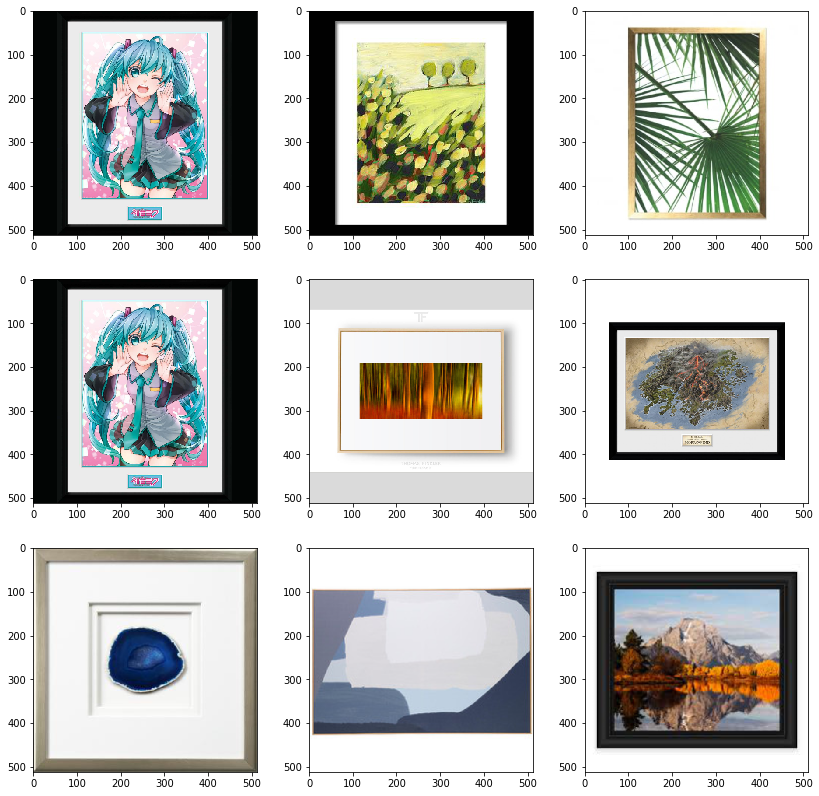

In [10]:
# Подготовка изображений!
# Необходимо раскомментировать самую нижнюю строку чтобы запустить
from PIL import Image
from skimage import data, io, filters
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
import os
import cv2
import time
import sys

# Следующие 2 функции для ресайза изображения и дополнения до квадрата
# Взято из 3 практики по ML
def add_pad(img, shape):
    color_pick = img[0][0]
    padded_img = color_pick * np.ones(shape + img.shape[2:3], dtype=np.uint8)
    x_offset = int((padded_img.shape[0] - img.shape[0]) / 2)
    y_offset = int((padded_img.shape[1] - img.shape[1]) / 2)
    padded_img[x_offset:x_offset + img.shape[0], y_offset:y_offset + img.shape[1]] = img
    return padded_img


def resize(img, shape):
    scale = min(shape[0] * 1.0 / img.shape[0], shape[1] * 1.0 / img.shape[1])
    if scale != 1:
        img = cv2.resize(img, dsize=None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    return img


def prepare_images(path_from, path_save_to):
  filenames = []
  for i, file in enumerate(os.listdir(path_from)):
    if not file.endswith(('.jpg', '.jpeg', '.png')):
      continue
    extension = file.split('.')[1]
    filenames.append((int(file[3:-(len(extension)+1)]), extension))
  filenames.sort(key=lambda x: x[0])
  for i, file in enumerate(filenames):
    print(file)
    sys.stdout.write("\033[F")
    time.sleep(1)
    img = io.imread(path_from + '/pic' + str(file[0]) + '.' + file[1])
    #Subsection of the image
    img = resize(img, (512, 512))
    img = add_pad(img, (512, 512))

    path = str(i) + '.tif'
    io.imsave(path_save_to + '/' + path, img)

prepare_images("image_dataset_unet", "unet/data/train/image")
show_images("unet/data/train/image", X_images, random_index)

31


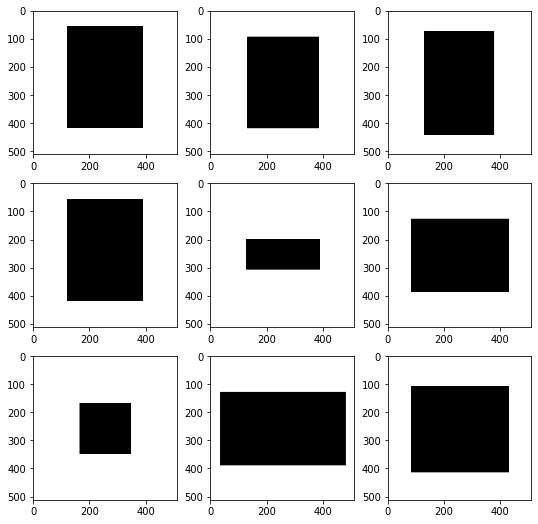

In [9]:
prepare_images("labels_dataset_unet_content_dirty2", "unet/data/train/label")
show_images("unet/data/train/label", X_images, random_index)

In [0]:
prepare_images("test_dataset_unet", "unet/data/test")

#### **Шаг 3 - обучение и запуск нейросети**
[Ссылка на data.py - подготовка данных](https://github.com/Alexflames/unet/blob/frame-detection/data.py)


In [7]:
!python unet/data.py

Using TensorFlow backend.
------------------------------
Creating training images...
------------------------------
31
Done: 0/31 images
loading done
Saving to .npy files done.
------------------------------
Creating test images...
------------------------------
14
loading done
Saving to imgs_test.npy files done.


[Ссылка на unet.py - обучение и запуск сетки unet](https://github.com/Alexflames/unet/blob/frame-detection/unet.py)

In [8]:
!python unet/unet.py

Using TensorFlow backend.
loading data
------------------------------
load train images...
------------------------------
------------------------------
load test images...
------------------------------
loading data done



conv1 shape: (?, 512, 512, 64)
conv1 shape: (?, 512, 512, 64)

pool1 shape: (?, 256, 256, 64)
conv2 shape: (?, 256, 256, 128)
conv2 shape: (?, 256, 256, 128)
pool2 shape: (?, 128, 128, 128)
conv3 shape: (?, 128, 128, 256)
conv3 shape: (?, 128, 128, 256)
pool3 shape: (?, 64, 64, 256)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


unet/unet.py:143: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
got unet
Fitting model...
unet/unet.py:160: UserWarning: The `nb_epoch` argument in `fit` has been 

14


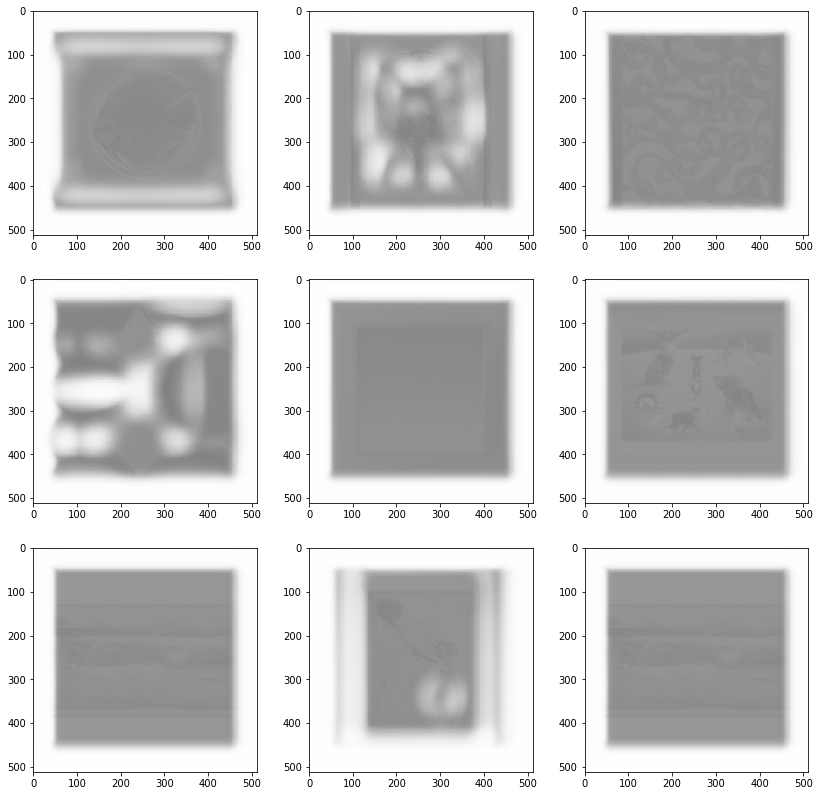

14


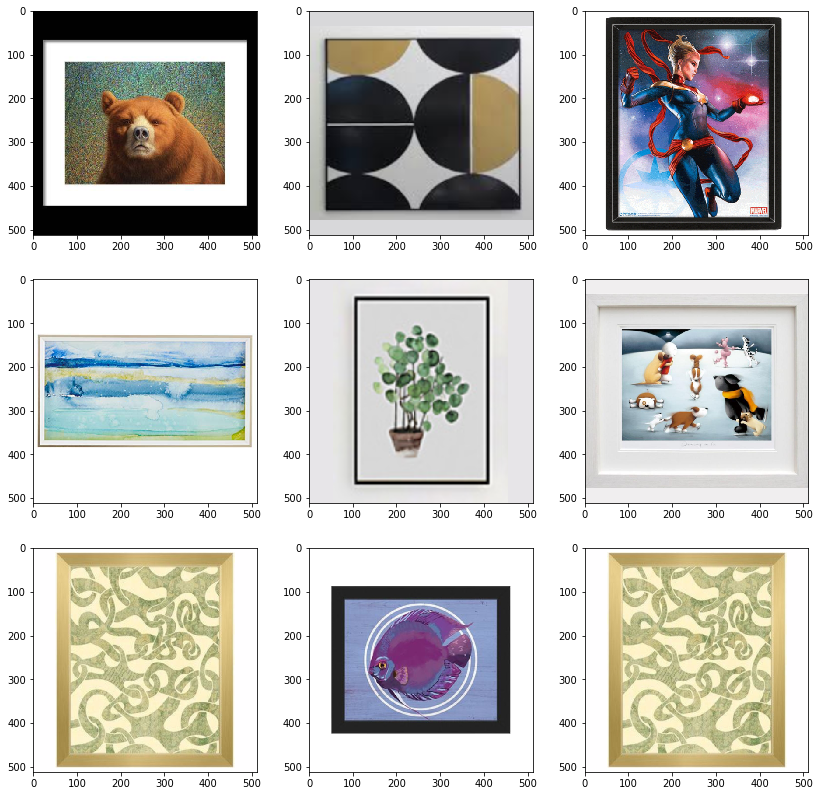

In [11]:
from matplotlib import pyplot as plt

random_index = np.random.choice((13), X_images)
show_images("unet/data/results", 9, random_index)
show_images("unet/data/test", 9, random_index)